# Erratic motion: random walks

## Introduction

A stochastic (i.e. *random*) process is a temporal **sequence** of random variables. Possibly the simplest instance of stochastic processes are **random walks**, where the successive elements of the sequence are defined by the following recursive relation

$$
\begin{equation}
x_{n+1} = x_{n}+l \xi_n,
\end{equation}
$$ (rw)

where $\xi_n$ is a random variable with zero average $\langle \xi_n\rangle=0$ and unit variance $\langle \xi_n \xi_{n\prime}\rangle=1$ and $\ell$ the scale for the random steps.

The index $n$ represents a discretisation of time, so that one can rewrite Eq.{eq}`rw` as 

$$
\begin{equation}
x_{t+\Delta t} = x_{t}+l \xi_t,
\end{equation}
$$

The erratic motion of a random walker constitutes a minimal model for what is called **Brownian motion**. 

```{admonition} Historical note: Brownian motion
:class: history dropdown


In 1827 Robert Brown reported about his optical microscope observations of the irregular motions of pollen grains suspended in water. His serendipituous discovery was originally motivated by a biological motive: to understand the machanisms of reproduction in plants.

What he found, instead, was that pollen in water exhibited an erratic motion, regardless of the kind of plant considered, whether the plant was alive or not and regardless of whether the plant was believed to have sexual organs.

Link to the original notes by Brown  [&rarr;](https://sciweb.nybg.org/science2/pdfs/dws/Brownian.pdf) .

Brown did not attempt an explanation, but did not exclude that the motion was inanimated.

Only much later Albert Einstein provided a physical description that could rationalise Brownian motion. Einstein did this in his seminal 1905 article in *Annalen der Physik* (see a later account in English in {cite}`einstein1956investigations`).

```

When time is not discretised, random walks are treated rigorously within the mathematical theory of [Wiener processes](https://en.wikipedia.org/wiki/Wiener_process).

Here we characterise the key properties of random walks, and we do so by focusing initially on simplest case of **one-dimensional random walks**

## One dimensional motion and its statistics

In one dimension, eq.{eq}`rw` represents the motion of a particle on a line, kicked to the left or the right with equal proability and performing steps of length $\ell$.

As the process is stochastic, the position of the particle at a given time $t=n\Delta t$ is also a random variable. Therefore, the key quantity of interest is the probability distribution $P(x_t|x_0)$, i.e. the probability to find the particle at position $x$ at time $t$ knowing that the initial position was $x_0$.

Let us take a general case where the probability to move right is $p$ and the probability to move right is $q=1-p$. 

It is easy to simulate this process directly using elementary `Python`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def naive_random_walker(N, M, delta=1.0, dims=1):
    """
    Simulates a random walk. Parameters:
    - N: number of steps
    - M: number fo walkers
    - delta: size of one step (default=1)
    - dims : number of dimensions (default=1)
    """

    # The initial position is the origin
    position = np.zeros((N, M, dims))
    # Random walks
    for i in range(1, N):
        for w in range(M):
            dr = delta * np.random.choice([-1, 1], size=dims)
            position[i, w] = position[i - 1, w] + dr
    return position


It is easy to histogram the positions to approximate the evolution of $P(x,t)$. For example, 

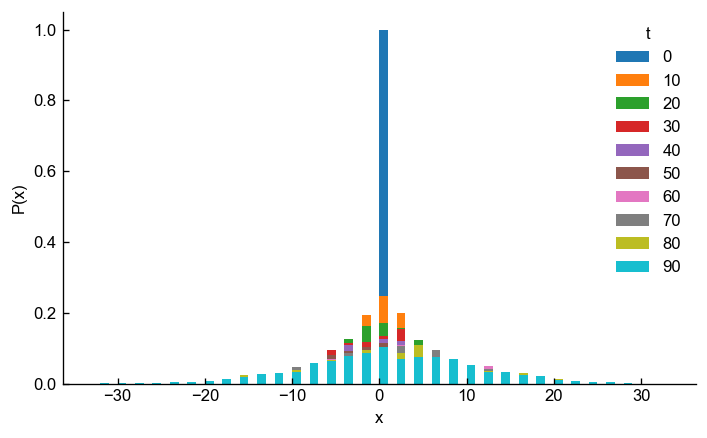

In [3]:
positions = naive_random_walker(100, 1000)
max_dist = np.abs(positions).max()
every = 10
for t, pos in enumerate(positions[::every]):
    plt.hist(
        pos, bins=np.arange(-max_dist, max_dist + 1), label=str(t * every), density=True
    )
plt.legend(title="t")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.show()


As the system evolves, the distribution $P(x)$ evolves from a narrow (i.e. *delta*) distribution to a broader, symmetric distribution, reminiscent of a normal distribution.

Indeed, one can prove that the distribution of the displacememnt form the origin $x$ at time $t$ converges (in the limit of a large number of walks) to 

$$
\begin{equation}
 P(x,t)\approx2\mathcal{N}(0,\sigma^2) = \frac{2}{\sqrt{2 \pi l^{2}t /\Delta t}} \exp \left(-\frac{x^{2} \Delta t }{ 2 l^{2}t}\right) 
\end{equation}
$$
where $\mathcal{N}(m,s^2)$ is the normal distirbution with mean $m$  and standard deviation $s$ and the factor 2 takes into account the fact that only even (odd) bins can be filled for even (odd) $t$. 

```{admonition} Proof
:class: proof dropdown

Let $p$ and $q=1-p$ be the probability of a right/left step respectively. After $N$ steps, what is the probability of a walker that departed form the origin to be at position $m$?

We know that $N=n_1+n_2$ where $n_1$ is the number of steps to the right and $n_2$ is the number of steps to the left. The position is $m=n_1-n_2$  so we can write


$$
\begin{equation}
n_1=\frac{1}{2}(N+m)\quad,\quad n_2=\frac{1}{2}(N-m)
\end{equation}
$$

Every step is independent so the probability of an individual path is 

$$
{\rm Prob(path)}\propto p^{n_1} q^{n_2}=p^{\frac{1}{2}(N+m)} q^{\frac{1}{2}(N-m)}$$

Now some combinatorics. We need to count the number of ways we can realise a path with the pair of steps $(n_1,n_2)$. This is given by the combinations $\dfrac{N!}{n_1! n_2!}$.

Putting this all together we have that

$$
\begin{equation}
P(m, N)=\frac{N !}{\left(\frac{N+m}{2}\right) !\left(\frac{N-m}{2}\right) !} p^{\frac{1}{2}(N+m)} q^{\frac{1}{2}(N-m)}
\end{equation}
$$

In this expression we can recognise the **binomial distribution** 


$$P(k,N)=\left(\begin{array}{l}
N \\
k
\end{array}\right) p^k(1-p)^{N-k}$$

with $k=(N+m)/2$. The first and second central moments of the binomial distributions are

$$\langle k\rangle = Np \quad {,} \quad \sigma^2=\langle k^2\rangle-\langle k\rangle^2=Npq$$

For $p=q=1/2$ we have

$$
\begin{equation}
P(m, N)=\frac{N !}{\left(\frac{N+m}{2}\right) !\left(\frac{N-m}{2}\right) !} \left(\dfrac{1}{2}\right)^N
\end{equation}
$$

or correspondingly 

$$P(k,N)=\left(\begin{array}{l}
N \\
k
\end{array}\right) \left(\dfrac{1}{2}\right)^{N}$$

with mean $\langle k\rangle =N/2$ and variance ${\rm Var}[k]=N/4$.

In the large $N$ limit, the Central Limit Theorem ensures that the binomial distribution converges to a normal distribution with identical mean and variance, so that

$$
P(k,N)\rightarrow\dfrac{1}{\sqrt{2\pi N/4}}e^{-\frac{(k-N/2)^2}{2N/4}}
$$

And, by simplifying and recalling that $m = 2k-N$  we have

$$
P(m,N) = \dfrac{2}{\sqrt{2\pi N}} e^{-\frac{ m}{2N}}
$$

The mean of the displacement is therefore

$$
\langle m\rangle = 2\langle k\rangle-N  =2pN-N=0
$$

and its variance 

$$
{\rm Var}[m]=\langle m^2\rangle-\langle m\rangle^2 = {\rm Var}[2 k-N]=4{\rm Var}[k] = N
$$

```


## Mean squared displacement (MSD)

It is convenient to define a 
The pdf $P(x,t)$ has  average $\langle x \rangle =0$, corresponding to the expectation that in an (unbiased) random walk there is no net motion in one direction or the other (on average). Its variance is 

$$
\begin{equation}
\langle x^2\rangle=\dfrac{l^2t}{\Delta t}
\end{equation}
$$

If we define the **diffusion constant** 

$$
\begin{equation}
D = \dfrac{l^2}{2\Delta t}
\end{equation}
$$

the variance reads 

$$
\begin{equation}
\langle x^2\rangle=2Dt
\end{equation}
$$

hence, while the typical position remains at the origin, an individually picked random walker can be rather far from the origin. This (squared) distance is called **mean squared displacement**

$$
\begin{equation}
{\rm MSD}(t) =\langle |x(t)-x(0)|^2\rangle = 2Dt
\end{equation}
$$

```{admonition} Key properties
:class: key
- the MSD is estimated from the **variance** of the probability distribution of the displacement of the population of walkers.
- the MSD grows **linearly** with time.
- the constant of proportionality between the MSD and time is the **diffusion coefficient**, times a geometric factor that depends on dimensionality (see below).

```

We can calculate the mean squared displacement directly from the time-series of particle positions. In a **double-logarithmic** plot this results in a straight line. Fitting the MSD with a linear regression provides an estimate for the diffusion constant.

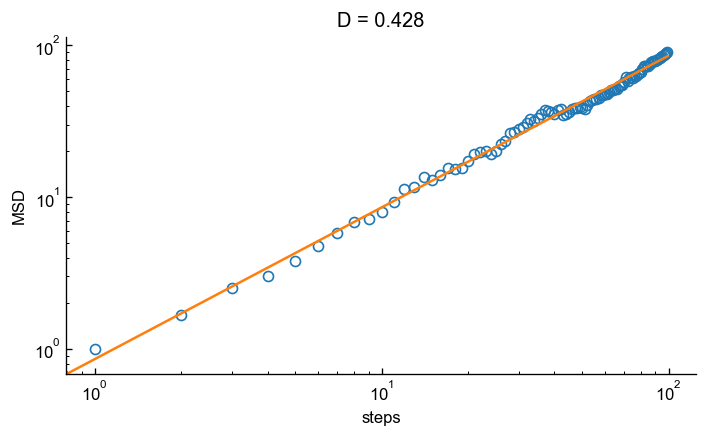

In [2]:
from statistics import linear_regression

N = 100
M = 100
positions = naive_random_walker(N, M, dims=1)
t = np.arange(N)
msd = np.mean((positions - positions[0]) ** 2, axis=1)
# linear fit with zero intercept. transform msd in column vector
slope, intercept = linear_regression(t, msd, proportional=True)

plt.loglog(t, msd,'o', mfc='None')
plt.loglog(t,slope*t)
plt.title(f"D = {slope/2:.3f}")
plt.xlabel("steps")
plt.ylabel("MSD")
plt.show()


```{bibliography}
:style: unsrt
:filter: docname in docnames
```

